In [78]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
churn = pd.read_csv("churn.csv") #have the churn.csv file saved in the same folder as jupyter file

In [80]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [81]:
pd.set_option('display.max_columns', None) #these two lines are used to display all columns and rows at all times, found from https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
pd.set_option('display.max_rows', None)

In [106]:
print(churn.shape)

(6589, 38)


In [107]:
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [84]:
churn = churn.loc[churn["Customer Status"] != "Joined" ]
print(churn.shape)

(6589, 38)


In [85]:
from sklearn.preprocessing import LabelEncoder
churn_1=churn.apply(LabelEncoder().fit_transform)
churn_1=MultiColumnLabelEncoder(columns = ["Customer ID","Gender","Married","City","Offer","Phone Service",
                                          "Multiple Lines","Internet Service","Internet Type",
                                          "Online Security","Online Backup","Device Protection Plan",
                                          "Premium Tech Support", "Streaming TV","Streaming Movies",
                                          "Streaming Music","Unlimited Data","Contract","Paperless Billing",
                                          "Payment Method","Customer Status","Churn Category","Churn Reason"]).fit_transform(churn)

In [86]:
churn_1.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,0,37,1,0,346,93225,34.827662,-118.999073,2,9,0,1,42.39,0,1,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1,5,20
1,1,1,46,0,0,368,91206,34.162515,-118.203869,0,9,0,1,10.69,1,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1,5,20
2,2,1,50,0,0,222,92627,33.645672,-117.922613,0,4,5,1,33.65,0,1,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0,1,2
3,3,1,78,1,0,587,94553,38.014457,-122.115432,1,13,4,1,27.82,0,1,2,4.0,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0,2,18
4,4,0,75,1,0,139,93010,34.227846,-119.079903,3,3,0,1,7.38,0,1,2,11.0,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0,2,14


In [87]:
churn_1.shape

(6589, 38)

In [88]:
churn_1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [89]:
churn_1 = churn_1.drop(columns = ["Customer ID","City", "Zip Code","Latitude", 
                                  "Longitude","Churn Category","Churn Reason"])

In [90]:
churn_1.shape

(6589, 31)

In [91]:
churn_1[churn_1.columns[1:]].corr()['Customer Status'][:].sort_values(ascending=False)#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

Customer Status                      1.000000
Contract                             0.484365
Tenure in Months                     0.433759
Online Security                      0.343955
Premium Tech Support                 0.340860
Number of Referrals                  0.312118
Online Backup                        0.302242
Device Protection Plan               0.294746
Total Revenue                        0.278626
Total Long Distance Charges          0.268430
Total Charges                        0.250071
Number of Dependents                 0.232525
Streaming Music                      0.220637
Streaming Movies                     0.216001
Streaming TV                         0.214154
Unlimited Data                       0.193174
Married                              0.183273
Payment Method                       0.128371
Avg Monthly GB Download              0.095132
Internet Type                        0.046419
Total Refunds                        0.043525
Multiple Lines                    

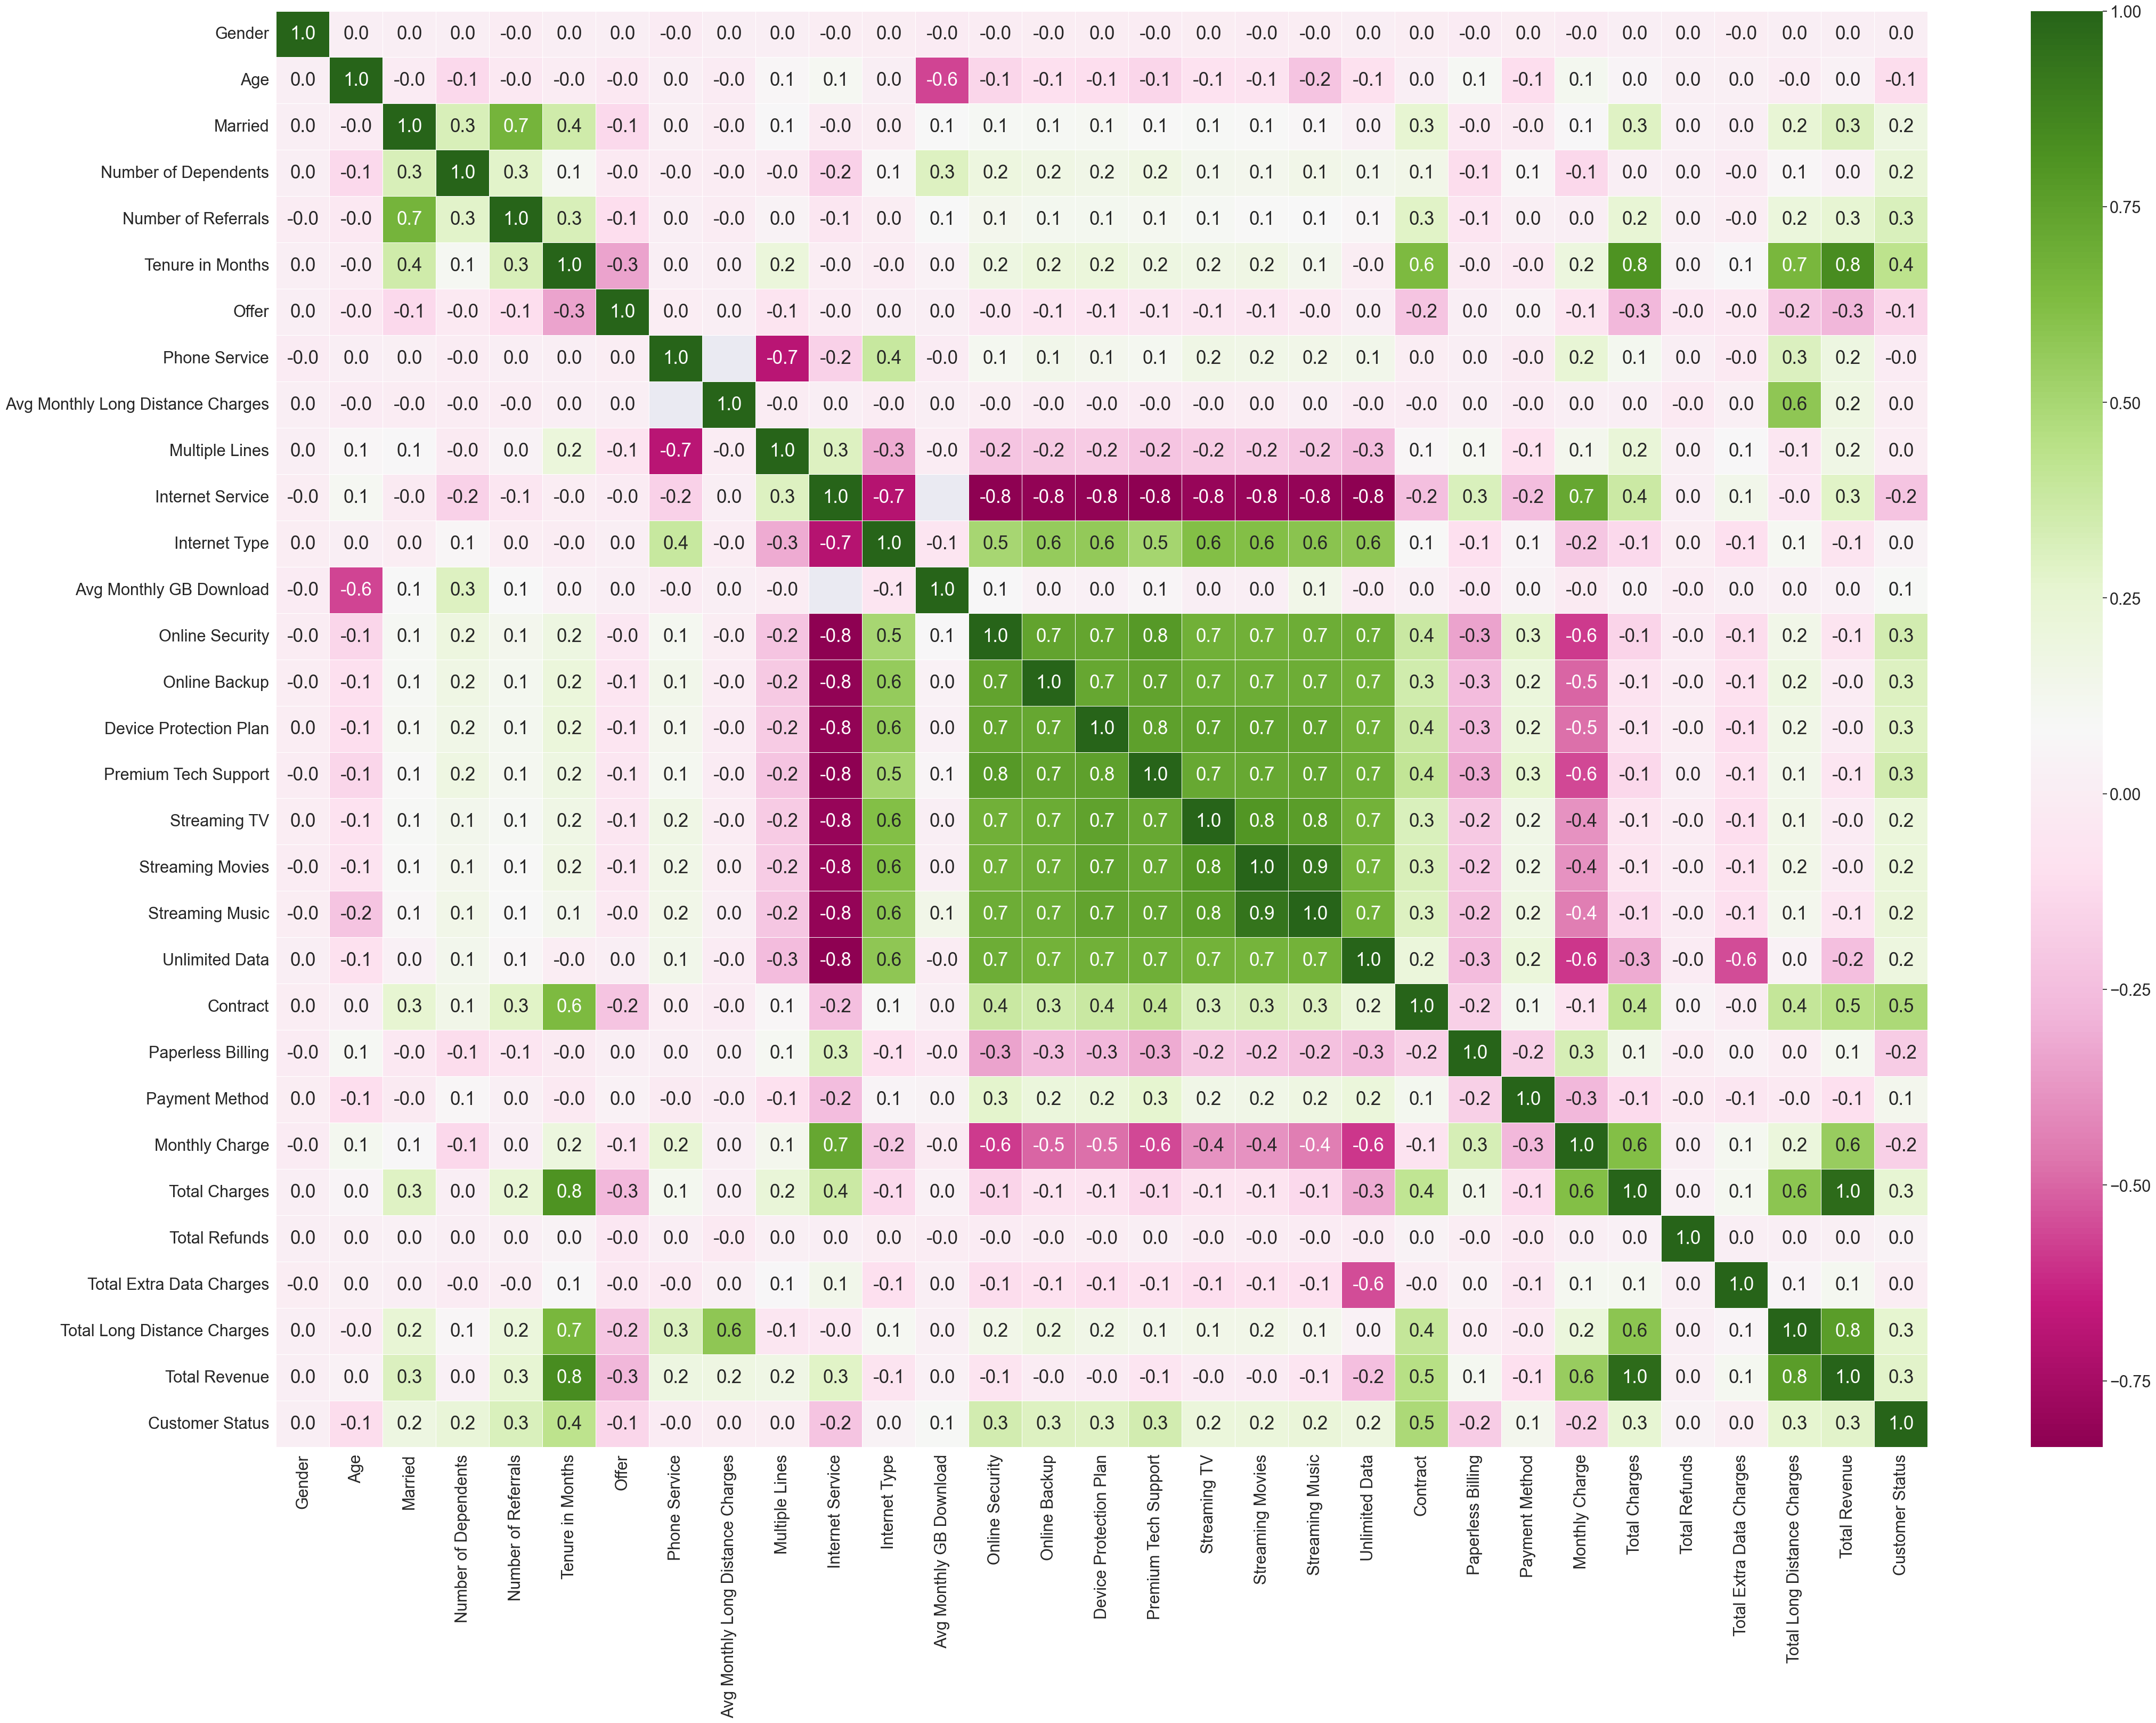

In [92]:
correlation=churn_1.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [93]:
churn_1["Streaming"] = np.where(churn_1["Streaming TV"]+churn_1["Streaming Movies"]+
                             churn_1["Streaming Music"] ==0,0,1)  #np.where found here https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
churn_1["Avg Quarterly Long Distance Charges"] = churn_1["Avg Monthly Long Distance Charges"]*3
churn_1["Avg Quarterly GB Download"] = churn_1["Avg Monthly GB Download"]*3
churn_1["Quarterly Charge"] = churn_1["Monthly Charge"]*3
churn_1=churn_1.drop(columns=["Streaming TV", "Streaming Movies", "Streaming Music","Total Charges",
                              "Total Refunds","Total Extra Data Charges","Total Long Distance Charges",
                             "Avg Monthly Long Distance Charges","Avg Monthly GB Download","Monthly Charge"])

churn_1.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Revenue,Customer Status,Streaming,Avg Quarterly Long Distance Charges,Avg Quarterly GB Download,Quarterly Charge
0,0,37,1,0,2,9,0,1,0,1,0,0,1,0,1,1,1,1,1,974.81,1,1,127.17,48.0,196.8
1,1,46,0,0,0,9,0,1,1,1,0,0,0,0,0,0,0,0,1,610.28,1,1,32.07,30.0,-12.0
2,1,50,0,0,0,4,5,1,0,1,2,0,0,1,0,1,0,1,0,415.45,0,0,100.95,90.0,221.7
3,1,78,1,0,1,13,4,1,0,1,2,0,1,1,0,1,0,1,0,1599.51,0,1,83.46,12.0,294.0
4,0,75,1,0,3,3,0,1,0,1,2,0,0,0,1,1,0,1,1,289.54,0,1,22.14,33.0,251.7


In [94]:
churn_1.isna().sum()

Gender                                    0
Age                                       0
Married                                   0
Number of Dependents                      0
Number of Referrals                       0
Tenure in Months                          0
Offer                                     0
Phone Service                             0
Multiple Lines                            0
Internet Service                          0
Internet Type                             0
Online Security                           0
Online Backup                             0
Device Protection Plan                    0
Premium Tech Support                      0
Unlimited Data                            0
Contract                                  0
Paperless Billing                         0
Payment Method                            0
Total Revenue                             0
Customer Status                           0
Streaming                                 0
Avg Quarterly Long Distance Char

In [95]:
churn_1=churn_1.dropna()
print("# of Missing Values Remaining: ",churn_1.isna().sum().sum())
churn_1.shape

# of Missing Values Remaining:  0


(4601, 25)

In [96]:
X = churn_1.loc[:,["Contract","Tenure in Months","Online Security","Premium Tech Support","Number of Referrals","Total Revenue","Online Backup","Device Protection Plan","Number of Dependents","Streaming","Married","Unlimited Data","Payment Method","Internet Service"]]
X_full = churn_1.loc[:, churn_1.columns != "Customer Status"]#https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe
y = churn_1["Customer Status"]

In [97]:
(X_train, X_test, 
 y_train,  y_test) = skms.train_test_split(X,y,test_size=.25)

In [98]:
(X_train_full, X_test_full, 
 y_train_full,  y_test_full) = skms.train_test_split(X_full,y,test_size=.25)

In [99]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
fit   = knn.fit(X_train, y_train) 
preds = fit.predict(X_test)
print("5NN accuracy:", 
      metrics.accuracy_score(y_test, preds))

5NN accuracy: 0.7228496959165943


In [100]:
fit_full   = knn.fit(X_train_full, y_train_full) 
preds_full = fit_full.predict(X_test_full)
print("5NN accuracy:", 
      metrics.accuracy_score(y_test_full, preds_full))

5NN accuracy: 0.7602085143353605


In [101]:
nb    = naive_bayes.GaussianNB() 
NBfit   = nb.fit(X_train, y_train)
NBpreds = NBfit.predict(X_test)

print("NB accuracy:", 
      metrics.accuracy_score(y_test, NBpreds))

NB accuracy: 0.7619461337966985


In [102]:
nb    = naive_bayes.GaussianNB() 
NBfit_full   = nb.fit(X_train_full, y_train_full)
NBpreds_full = NBfit_full.predict(X_test_full)

print("NB accuracy:", 
      metrics.accuracy_score(y_test_full, NBpreds_full))

NB accuracy: 0.7793223284100782


In [103]:
print("5-Fold Negative Mean Squared Error for 5NN: ",skms.cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
print("5-Fold Negative Mean Squared Error for NB: ",skms.cross_val_score(nb, X, y, cv=5, scoring='neg_mean_squared_error'))

5-Fold Negative Mean Squared Error for 5NN:  [-0.26710098 -0.27391304 -0.26304348 -0.27173913 -0.26521739]
5-Fold Negative Mean Squared Error for NB:  [-0.23127036 -0.24565217 -0.23369565 -0.23043478 -0.21195652]


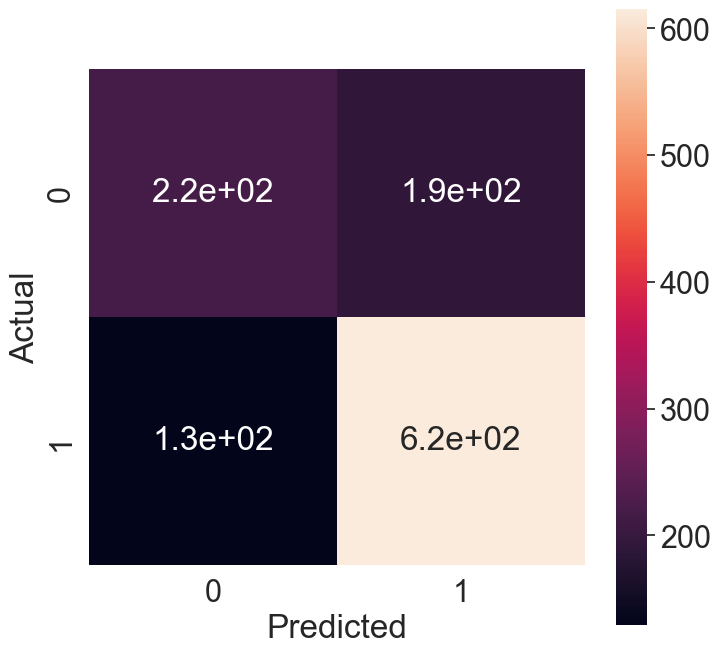

In [104]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
cm = metrics.confusion_matrix(y_test, preds)
ax = sns.heatmap(cm, annot=True, square=True,)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');